In [1]:
import numpy as np

def pageRank(A, beta, eps):
    def hasInDegrees(matrix):
        degrees = np.zeros(len(matrix))
        for i in range(0, len(matrix)):
            for j in range(0, len(matrix)):
                degrees[i] = int(matrix[j][i] != 0)
                if degrees[i] != 0:
                    break


        return degrees
    def outDegrees(matrix):
        degrees = np.zeros(len(matrix))
        for i in range(0, len(matrix)):
            for j in range(0, len(matrix)):
                degrees[i] = int(matrix[i][j] != 0) + degrees[i]
        return degrees

    def step(matrix, vector):
        nonlocal inDegrees
        nonlocal outDegree
        nonlocal beta
        returnVector = np.zeros(len(vector))

        for i in range(0, len(vector)):
            sum_ = 0
            for j in range(0, len(vector)):
                if inDegrees[i] == 0:
                    break
                elif outDegree[j] == 0:
                    continue
                elif matrix[j][i] != 0:
                    sum_ = sum_ + vector[j] * beta / outDegree[j]
            returnVector[i] = sum_

        returnVector = returnVector + (1 - np.sum(returnVector)) / len(returnVector)

        return returnVector



    def manhattanDist(vector1, vector2):
        dist = 0
        for i in range(0, len(vector1)):
            dist = dist + abs(vector1[i]  - vector2[i])
        return dist

    r1 = np.zeros(len(A))/(len(A))
    r2 = np.ones(len(A))/(len(A))
    inDegrees = hasInDegrees(A)
    outDegree = outDegrees(A)

    while(manhattanDist(r1, r2) > eps):
        r1 = r2.copy()
        r2 = step(A, r1)
    return r2


A = [
    [0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0],
    [0,1,0,1,0,1,0,0,0,0,0],
    [0,1,0,0,1,0,0,0,0,0,0],
    [0,1,0,0,1,0,0,0,0,0,0],
    [0,1,0,0,1,0,0,0,0,0,0],
    [0,1,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0,0],
]

r = pageRank(A, 0.85, 0.001)
print(r)
print(np.sum(r))

[0.03278149 0.38418183 0.3431294  0.03908709 0.08088569 0.03908709
 0.01616948 0.01616948 0.01616948 0.01616948 0.01616948]
0.9999999999999999


### exercise 4.

In [112]:
matrix = [
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]
]


r = pageRank(matrix, 0.85, 0.001)
print(r)
print(np.sum(r))

[0.02142857 0.17347176 0.05829815 0.15742023 0.05829815 0.2753133
 0.25576985]
1.0


In [ ]:
r = pageRank(A, 0.85, 0.001)
print(r)
print(np.sum(r))

# exercise 5

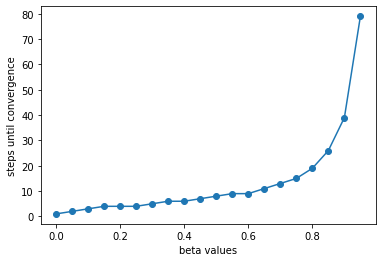

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def pageRankSteps(A, beta, eps):
    def hasInDegrees(matrix):
        degrees = np.zeros(len(matrix))
        for i in range(0, len(matrix)):
            for j in range(0, len(matrix)):
                degrees[i] = int(matrix[j][i] != 0)
                if degrees[i] != 0:
                    break


        return degrees
    def outDegrees(matrix):
        degrees = np.zeros(len(matrix))
        for i in range(0, len(matrix)):
            for j in range(0, len(matrix)):
                degrees[i] = int(matrix[i][j] != 0) + degrees[i]
        return degrees

    def step(matrix, vector):
        nonlocal inDegrees
        nonlocal outDegree
        nonlocal beta
        returnVector = np.zeros(len(vector))

        for i in range(0, len(vector)):
            sum_ = 0
            for j in range(0, len(vector)):
                if inDegrees[i] == 0:
                    break
                elif outDegree[j] == 0:
                    continue
                elif matrix[j][i] != 0:
                    sum_ = sum_ + vector[j] * beta / outDegree[j]
            returnVector[i] = sum_

        returnVector = returnVector + (1 - np.sum(returnVector)) / len(returnVector)

        return returnVector



    def manhattanDist(vector1, vector2):
        dist = 0
        for i in range(0, len(vector1)):
            dist = dist + abs(vector1[i]  - vector2[i])
        return dist

    r1 = np.zeros(len(A))/(len(A))
    r2 = np.ones(len(A))/(len(A))
    inDegrees = hasInDegrees(A)
    outDegree = outDegrees(A)

    steps = 0
    while(manhattanDist(r1, r2) > eps):
        r1 = r2.copy()
        r2 = step(A, r1)
        steps = steps + 1
    return steps

example = [
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]
]

betarray = np.arange(0, 1, 0.05)
steps = []
for beta in betarray:
    step = pageRankSteps(example, beta, 0.001)
    steps.append(step)



plt.plot(betarray, steps, '-o')
plt.xlabel("beta values")
plt.ylabel("steps until convergence")
plt.savefig("Convergence.png")

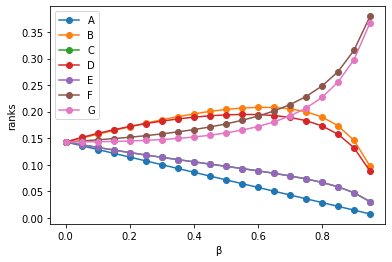

In [13]:

example = [
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]
]

betarray = np.arange(0, 1, 0.05)
ranks = []
for beta in betarray:
    rank = pageRank(example, beta, 0.001)
    ranks.append(rank)

labels = ["A", "B", "C", "D", "E", "F", "G"]

ranks = np.transpose(ranks)

for index in range(0, len(ranks)):
    plt.plot(betarray, ranks[index], '-o', label = labels[index])
plt.legend(loc='best')
plt.xlabel("β")
plt.ylabel("ranks")
plt.show()